CASE 1 - Um exemplo prático seria analisar um conjunto de dados de campanhas publicitárias para determinar quais fatores influenciam os clientes a clicar nos anúncios. Utilizando a regressão logística, podemos classificar cada cliente em termos de seu comportamento de clique, baseando-se em atributos como idade, renda, e o tipo de dispositivo usado para acessar o site.

In [41]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [43]:
# Gerando dados fictícios para exemplificar a regressão não linear

np.random.seed(42)

X_non_linear = np.random.rand(100, 1) * 10  # Variável independente
y_non_linear = X_non_linear ** 2 + np.random.rand(100, 1) * 10  # Variável dependente com padrão não linear

In [44]:
# Criando o modelo de regressão polinomial (não linear)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_non_linear)

# Dividindo os dados em conjuntos de treinamento e teste
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_non_linear, test_size=0.2, random_state=42)

In [45]:
# Criando o modelo de regressão linear
modelo_poly = LinearRegression()

# Treinamento do modelo
modelo_poly.fit(X_train_poly, y_train_poly)

# Previsões no conjunto de teste
predicoes_poly = modelo_poly.predict(X_test_poly)

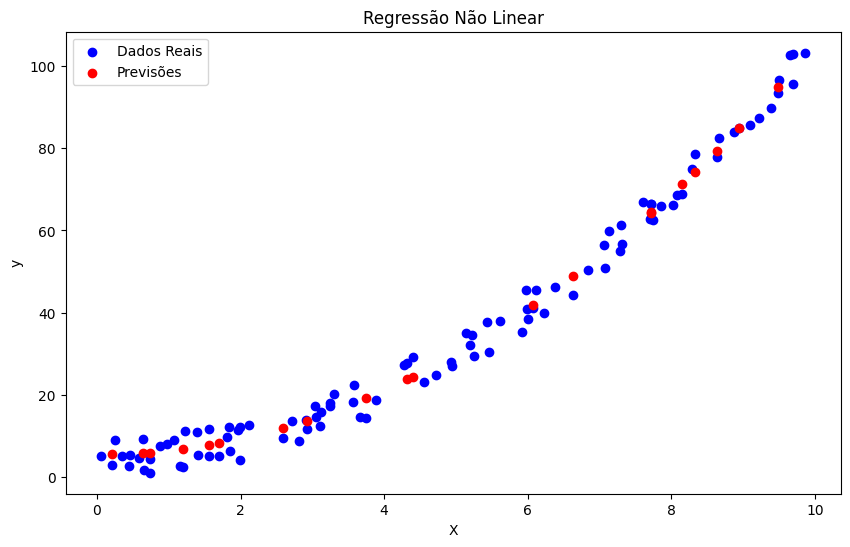

In [46]:
# Visualização dos resultados

plt.figure(figsize=(10, 6))
plt.scatter(X_non_linear, y_non_linear, color='blue', label='Dados Reais')
plt.scatter(X_test_poly[:, 1], predicoes_poly, color='red', label='Previsões')
plt.title('Regressão Não Linear')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [47]:
# Gerando dados fictícios para exemplificar a regressão logística

np.random.seed(42)

idade = np.random.randint(18, 70, 200)
renda = np.random.randint(20000, 100000, 200)
clicou_anuncio = np.random.choice([0, 1], size=200, p=[0.7, 0.3])

In [49]:
# Criando DataFrame com os dados

df_log = pd.DataFrame({

    'Idade': idade,
    'Renda': renda,
    'Clicou_Anuncio': clicou_anuncio

})

In [50]:
# Dividindo os dados em variáveis de entrada (X) e saída (y)

X_log = df_log[['Idade', 'Renda']]
y_log = df_log['Clicou_Anuncio']

# Divisão dos dados em conjuntos de treinamento e teste
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

In [51]:
# Criação do modelo de regressão logística
modelo_logistico = LogisticRegression()

# Treinamento do modelo
modelo_logistico.fit(X_train_log, y_train_log)

# Previsões no conjunto de teste
predicoes_log = modelo_logistico.predict(X_test_log)

In [53]:
# Avaliação do modelo

accuracy = accuracy_score(y_test_log, predicoes_log)
precision = precision_score(y_test_log, predicoes_log)
recall = recall_score(y_test_log, predicoes_log)
f1 = f1_score(y_test_log, predicoes_log)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
# Print dos resultados

print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'Pontuação F1: {f1}')
print(f'Acurácia: {accuracy}')
print(f'Matriz de Confusão:\n{confusion_matrix(y_test_log, predicoes_log)}')
print(f'Relatório de Classificação:\n{classification_report(y_test_log, predicoes_log)}')



Precisão: 0.0
Recall: 0.0
Pontuação F1: 0.0
Acurácia: 0.7
Matriz de Confusão:
[[28  0]
 [12  0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        28
           1       0.00      0.00      0.00        12

    accuracy                           0.70        40
   macro avg       0.35      0.50      0.41        40
weighted avg       0.49      0.70      0.58        40



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


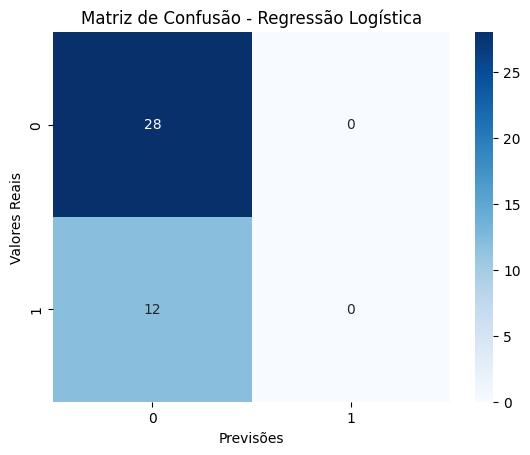

In [55]:
# Visualização da matriz de confusão

sns.heatmap(confusion_matrix(y_test_log, predicoes_log), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()